<a href="https://colab.research.google.com/github/Morrow98J/Fall_Portfolio_Project/blob/main/INFO490HP_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

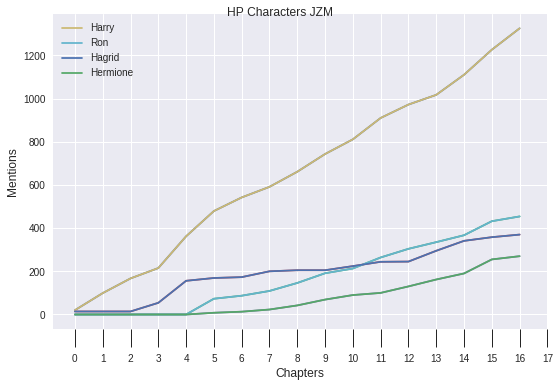

In [ ]:
import requests
import urllib.request
import re
import collections
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def read_remote(url):
  response = requests.get(url)
  if response.status_code == requests.codes.ok:
    return response.text
  return None

def build_google_drive_url(doc_id):
  DRIVE1  = "https://docs.google.com/uc"
  DRIVE2  = "https://drive.google.com/uc"
  baseurl = DRIVE2 # DRIVE2 works as well 
  params = {"export" : "download",
            "id"     : doc_id}
  url = baseurl + "?" + urllib.parse.urlencode(params) 
  return url
  
def get_harry_potter():
  google_id = get_book_id()
  url  = build_google_drive_url(google_id)
  return read_remote(url)
  
def get_book_id():
  return '1jOCDUhsMY3uAoLqV3NoZogyrr-FVqEoo'

def clean_hp(text):
  regex = re.compile(r'After updates copy this file to Google Drive !')
  regev = re.compile(r'249')
  m = regex.search(text)
  n = regev.search(text)
  tx = text[m.end():n.end()]
  regez = re.compile(r'Harry Potter and the Sorcerer\'s Stone')
  o = regez.search(tx)
  return tx[o.start():n.end()]
hp = clean_hp(get_harry_potter())
def load_stop_words(add_pronouns = False):
  pronouns = ['they', 'your', "who", "she'd", "he'd", 'madam', 'he', "she", 'i', 'it', "i'm", "i've", "oh", "you", "mr", "mrs", "i'll", "i'd"]
  stop_words = list(nlp.Defaults.stop_words)
  if add_pronouns is True:
    stop_words += pronouns
  return stop_words

def bi_grams(tokens):
  return [(tokens[i], tokens[i + 1]) for i in range(0, len(tokens)-1)]

def top_n(tokens, n):
  counter = collections.Counter()
  for i in tokens:
    counter[i] += 1
  return counter.most_common(n)

def split_text_into_tokens(text):
  pattern = r"['A-Za-z0-9]+-?['A-Za-z0-9]+"
  rd = re.findall(pattern, text)
  fin = []
  for i in rd:
    if i[len(i)-1] == '\'':
      i = i[:len(i)-1]
    if i[0] == '\'':
      i = i[1:]
    if i[len(i)-2:] == '\'s':
      i = i[:len(i)-2]
    fin.append(i)
  return fin

def find_characters_v1(text, stopwords = [], top = 15):
  tokens = split_text_into_tokens(text)
  cleantokens = []
  for token in tokens:
    if token.lower() in stopwords:
      pass
    else:
      if token[0].isupper():
        cleantokens.append(token)
  return top_n(cleantokens, top)

def find_characters_v2(text, stoplist = [], top = 15):
  tokens = split_text_into_tokens(text)
  cleantokens = []
  for token in tokens:
    if token.lower() in stoplist:
      pass
    else:
      cleantokens.append(token)
  bigrams = bi_grams(cleantokens)
  cleanbigrams = []
  for bigram in bigrams:
    bigr1 = bigram[0]
    bigr2 = bigram[1]
    if bigr1[0].isupper() and bigr2[0].isupper():
      cleanbigrams.append(bigr1 + ' ' + bigr2)
  return top_n(cleanbigrams, top)

def find_characters_nlp(text, top = 15):
  names = []
  doc = nlp(text)
  for entity in doc.ents:
    if entity.label_ == 'PERSON':
      names.append(entity.text)
  return top_n(names, top)

def split_into_chapters(data):
  split_text = re.split("CHAPTER [A-Z]+\n", data)
  return split_text[1:]

def get_character_counts_v1(chapters):
  harry = np.array(np.char.count(split_into_chapters(hp), 'Harry'))
  ron = np.array(np.char.count(split_into_chapters(hp), 'Ron'))
  hagrid = np.array(np.char.count(split_into_chapters(hp), 'Hagrid'))
  hermione = np.array(np.char.count(split_into_chapters(hp), 'Hermione'))
  return np.array([harry, ron, hagrid, hermione])

def simple_graph_v1(plots):

  fig = plt.figure()
  subplot = fig.add_subplot(1,1,1)

  subplot.plot(plots[0])
  subplot.plot(plots[1])
  subplot.plot(plots[2])
  subplot.plot(plots[3]) 

  return fig 

def simple_graph_v2(counts):
  fig = plt.figure()
  subplot = fig.add_subplot(1,1,1)
  subplot.plot(counts)
  return fig  # return the figure

def pipeline_v1():

  hp = clean_hp(get_harry_potter())
  chapters = split_into_chapters(hp)

  plots = get_character_counts_v1(chapters)
  fig = simple_graph_v1(plots)
  return fig

chapters = split_into_chapters(hp)
def get_character_counts_v2(chapters, names):

  # use the same function as v1
  # use a comprehension to easily get things done:
  py_data = [np.cumsum(np.char.count(chapters,n)) for n in names ]
  counts = np.array(py_data)

  return counts.T

def simple_graph_hp(counts, names):
  fig = plt.figure()
  subplot = fig.add_subplot(1,1,1)
  subplot.plot(counts)
  ar = subplot.plot(counts)
  subplot.set_ylabel("Mentions", fontsize=12)
  subplot.set_xlabel("Chapters", fontsize=12)
  subplot.grid(True)
  fig.suptitle("HP Characters JZM", fontsize=12)

  subplot.tick_params(axis='x', length=len(chapters)+1)
  plt.xticks(np.arange(0,len(chapters)+1, 1))
  subplot.legend(handles = ar, loc = 'upper left', labels = names)

  plt.style.use('seaborn')
  fig.tight_layout()

  return fig  # return the figure

def pipeline_v2(names):

  hp = clean_hp(get_harry_potter())
  chapters = split_into_chapters(hp)
 
  np_hp = get_character_counts_v2(chapters, names)
  fig = simple_graph_hp(np_hp, names)
  return fig

# test it
who = ["Harry", "Ron", "Hagrid", "Hermione"]
fig = pipeline_v2(who)